In [ ]:
# Import libaries 

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import data 

h1n1 = pd.read_csv('https://github.com/naseemdabiran/CIS_9660/blob/main/H1N1_Flu_Vaccines.csv')
h1n1

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [ ]:
h1n1.shape

(26707, 38)

In [ ]:
h1n1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
h1n1.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
# Drop employment_industry, employment_occupation, and health_insurance columns  --> High % of null columns 
h1n1.drop(['employment_occupation', 'employment_industry', 'health_insurance'], axis = 1, inplace = True)

In [ ]:
# Drop column(s) not of interest 
h1n1.drop(['respondent_id'], axis = 1, inplace = True)

In [ ]:
# Replace the missing h1n1_concern values with the mean rounded --> to fit with rest of data (discrete)
h1n1['h1n1_concern'].fillna(round(h1n1['h1n1_concern'].mean()), inplace = True)

# Replace the missing h1n1_knowledge values with the mean --> to fit with rest of data (discrete)
h1n1['h1n1_knowledge'].fillna(round(h1n1['h1n1_knowledge'].mean()), inplace = True)

# Replace the missing opinion_h1n1_vacc_effective values with the mean --> to fit with rest of data (discrete)
h1n1['opinion_h1n1_vacc_effective'].fillna(round(h1n1['opinion_h1n1_vacc_effective'].mean()), inplace = True)

# Replace the missing opinion_h1n1_risk values with the mean --> to fit with rest of data (discrete)
h1n1['opinion_h1n1_risk'].fillna(round(h1n1['opinion_h1n1_risk'].mean()), inplace = True)

# Replace the missing opinion_h1n1_sick_from_vacc values with the mean --> to fit with rest of data (discrete)
h1n1['opinion_h1n1_sick_from_vacc'].fillna(round(h1n1['opinion_h1n1_sick_from_vacc'].mean()), inplace = True)

# Replace the missing opinion_seas_risk values with the mean --> to fit with rest of data (discrete)
h1n1['opinion_seas_risk'].fillna(round(h1n1['opinion_seas_risk'].mean()), inplace = True)

# Replace the missing opinion_seas_vacc_effective values with the mean --> to fit with rest of data (discrete)
h1n1['opinion_seas_vacc_effective'].fillna(round(h1n1['opinion_seas_vacc_effective'].mean()), inplace = True)

# Replace the missing opinion_seas_sick_from_vacc values with the mean --> to fit with rest of data (discrete)
h1n1['opinion_seas_sick_from_vacc'].fillna(round(h1n1['opinion_seas_sick_from_vacc'].mean()), inplace = True)

# Replace the missing household_adults values with the mean --> to fit with rest of data (discrete)
h1n1['household_adults'].fillna(round(h1n1['household_adults'].mean()), inplace = True)

# Replace the missing household_children values with the mean --> to fit with rest of data (discrete)
h1n1['household_children'].fillna(round(h1n1['household_children'].mean()), inplace = True)

In [ ]:
# source: https://stackoverflow.com/questions/42789324/how-to-pandas-fillna-with-mode-of-column

# Replace the missing behavioral_antiviral_meds values with the mode (Because it is a binary column)
h1n1['behavioral_antiviral_meds'].fillna(h1n1['behavioral_antiviral_meds'].mode()[0], inplace = True)

# Replace the missing behavioral_avoidance values with the mode 
h1n1['behavioral_avoidance'].fillna(h1n1['behavioral_avoidance'].mode()[0], inplace = True)

# Replace the missing behavioral_face_mask values with the mode 
h1n1['behavioral_face_mask'].fillna(h1n1['behavioral_face_mask'].mode()[0], inplace = True)

# Replace the missing behavioral_wash_hands values with the mode 
h1n1['behavioral_wash_hands'].fillna(h1n1['behavioral_wash_hands'].mode()[0], inplace = True)

# Replace the missing behavioral_large_gatherings values with the mode 
h1n1['behavioral_large_gatherings'].fillna(h1n1['behavioral_large_gatherings'].mode()[0], inplace = True)

# Replace the missing behavioral_outside_home values with the mode 
h1n1['behavioral_outside_home'].fillna(h1n1['behavioral_outside_home'].mode()[0], inplace = True)

# Replace the missing behavioral_touch_face values with the mode 
h1n1['behavioral_touch_face'].fillna(h1n1['behavioral_touch_face'].mode()[0], inplace = True)

# Replace the missing doctor_recc_h1n1 values with the mode 
h1n1['doctor_recc_h1n1'].fillna(h1n1['doctor_recc_h1n1'].mode()[0], inplace = True)

# Replace the missing doctor_recc_seasonal values with the mode 
h1n1['doctor_recc_seasonal'].fillna(h1n1['doctor_recc_seasonal'].mode()[0], inplace = True)

# Replace the missing chronic_med_condition values with the mode 
h1n1['chronic_med_condition'].fillna(h1n1['chronic_med_condition'].mode()[0], inplace = True)

# Replace the missing health_worker values with the mode 
h1n1['health_worker'].fillna(h1n1['health_worker'].mode()[0], inplace = True)

# Replace the missing child_under_6_months values with the mode 
h1n1['child_under_6_months'].fillna(h1n1['child_under_6_months'].mode()[0], inplace = True)

In [ ]:
# Replace the missing age_group values with the mode (Because it is a object column)
h1n1['age_group'].fillna(h1n1['age_group'].mode()[0], inplace = True)

# Replace the missing education values with the mode (Because it is a object column)
h1n1['education'].fillna(h1n1['education'].mode()[0], inplace = True)

# Replace the missing race values with the mode (Because it is a object column)
h1n1['race'].fillna(h1n1['race'].mode()[0], inplace = True)

# Replace the missing sex values with the mode (Because it is a object column)
h1n1['sex'].fillna(h1n1['sex'].mode()[0], inplace = True)

# Replace the missing income_poverty values with the mode (Because it is a object column)
h1n1['income_poverty'].fillna(h1n1['income_poverty'].mode()[0], inplace = True)

# Replace the missing marital_status values with the mode (Because it is a object column)
h1n1['marital_status'].fillna(h1n1['marital_status'].mode()[0], inplace = True)

# Replace the missing rent_or_own values with the mode (Because it is a object column)
h1n1['rent_or_own'].fillna(h1n1['rent_or_own'].mode()[0], inplace = True)

# Replace the missing employment_status values with the mode (Because it is a object column)
h1n1['employment_status'].fillna(h1n1['employment_status'].mode()[0], inplace = True)

In [ ]:
# Drop rows with null values rows for rest of columns 
h1n1 = h1n1.dropna()

In [ ]:
h1n1.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


In [ ]:
h1n1.shape

(26707, 34)

In [ ]:
h1n1['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

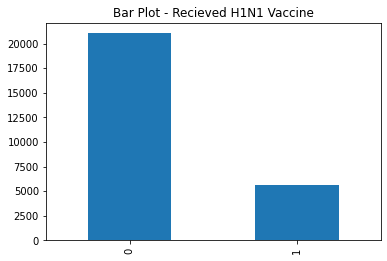

In [ ]:
h1n1['h1n1_vaccine'].value_counts().plot(kind='bar')
plt.title('Bar Plot - Recieved H1N1 Vaccine')
plt.show()

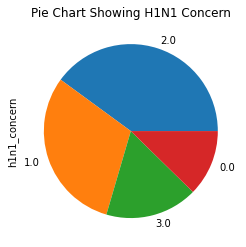

In [ ]:
h1n1['h1n1_concern'].value_counts().plot.pie(title = 'Pie Chart Showing H1N1 Concern')
plt.show()

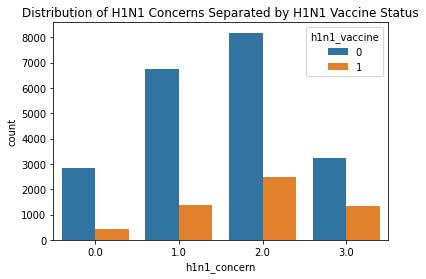

In [ ]:
sns.countplot(x='h1n1_concern', data = h1n1, hue = 'h1n1_vaccine')
plt.title('Distribution of H1N1 Concerns Separated by H1N1 Vaccine Status')
plt.show()

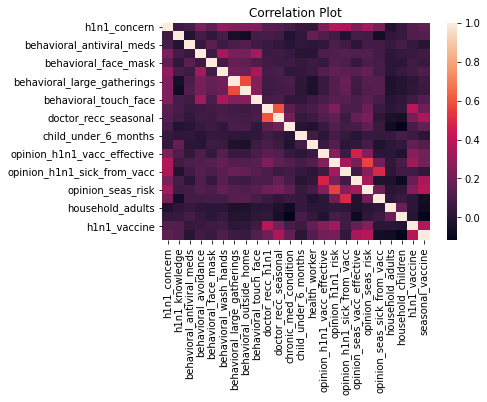

In [ ]:
# Correlation Plot
sns.heatmap(h1n1.corr())
plt.title('Correlation Plot')
plt.show()

In [ ]:
# Hot Encoding age_group 
age_encoding = pd.get_dummies(h1n1['age_group'])
h1n1 = h1n1.drop('age_group', axis = 1)
h1n1 = h1n1.join(age_encoding)

# Hot Encoding education 
edu_encoding = pd.get_dummies(h1n1['education'])
h1n1 = h1n1.drop('education', axis = 1)
h1n1 = h1n1.join(edu_encoding)

# Hot Encoding race 
race_encoding = pd.get_dummies(h1n1['race'])
h1n1 = h1n1.drop('race', axis = 1)
h1n1 = h1n1.join(race_encoding)

# Hot Encoding sex
h1n1['sex'] = pd.get_dummies(h1n1['sex'], drop_first = True)

# Hot Encoding income_poverty 
income_encoding = pd.get_dummies(h1n1['income_poverty'])
h1n1 = h1n1.drop('income_poverty', axis = 1)
h1n1 = h1n1.join(income_encoding)

# Hot Encoding marital_status
h1n1['marital_status'] = pd.get_dummies(h1n1['marital_status'], drop_first = True)

# Hot Encoding rent_or_own
h1n1['rent_or_own'] = pd.get_dummies(h1n1['rent_or_own'], drop_first = True)

# Hot Encoding employment_status 
employment_encoding = pd.get_dummies(h1n1['employment_status'])
h1n1 = h1n1.drop('employment_status', axis = 1)
h1n1 = h1n1.join(employment_encoding)

# Hot Encoding hhs_geo_region 
geo_encoding = pd.get_dummies(h1n1['hhs_geo_region'])
h1n1 = h1n1.drop('hhs_geo_region', axis = 1)
h1n1 = h1n1.join(geo_encoding)

# Hot Encoding census_msa 
census_encoding = pd.get_dummies(h1n1['census_msa'])
h1n1 = h1n1.drop('census_msa', axis = 1)
h1n1 = h1n1.join(census_encoding)

In [ ]:
# Split Data into targets and features
X = h1n1.drop('h1n1_vaccine', axis = 1).values
y = h1n1['h1n1_vaccine'].values

In [ ]:
# Split data into training and tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# Standardizing Dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training Decision Tree Classifier 
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Parameters of Decision Tree Classifier
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# 5-Fold Cross Validation - Decision Tree  
k = 5
kf = KFold(n_splits=k)

result_dt = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy') 
print(f'Decision Tree Avg accuracy:{result_dt.mean()}')

Decision Tree Avg accuracy:0.7790194200473342


In [ ]:
# Making Predictions - Decision Tree 
y_pred_dt = dt.predict(X_test)

In [ ]:
# Classification Report - Decision Tree
print(f'Classification Report for Decision Tree')
print(classification_report(y_test, y_pred_dt, target_names = ['Not H1N1 vaccinated', 'H1N1 vaccinated']))

Classification Report for Decision Tree
                     precision    recall  f1-score   support

Not H1N1 vaccinated       0.85      0.86      0.86      6279
    H1N1 vaccinated       0.48      0.47      0.48      1734

           accuracy                           0.78      8013
          macro avg       0.67      0.67      0.67      8013
       weighted avg       0.77      0.78      0.78      8013



In [ ]:
# Training Random Forest Classifier 
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

In [ ]:
# 5-Fold Cross Validation - Random Forest  
k = 5
kf = KFold(n_splits=k)

result_rf = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy') 
print(f'Random Forest Avg accuracy:{result_rf.mean()}')

Random Forest Avg accuracy:0.8336900637089055


In [ ]:
# Making Predictions - Random Forest
y_pred_rf = rf.predict(X_test)

In [ ]:
# Classification Report - Random Forest
print(f'Classification Report for Decision Tree')
print(classification_report(y_test, y_pred_rf, target_names = ['Not H1N1 vaccinated', 'H1N1 vaccinated']))

Classification Report for Decision Tree
                     precision    recall  f1-score   support

Not H1N1 vaccinated       0.85      0.95      0.90      6279
    H1N1 vaccinated       0.70      0.40      0.51      1734

           accuracy                           0.83      8013
          macro avg       0.78      0.68      0.70      8013
       weighted avg       0.82      0.83      0.82      8013

